In [18]:
#importing the modules and libraries
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

In [6]:
df=pd.read_csv("D:/Chathurangis/IBM/COVID19-eng/COVID19-eng.csv")
df

,Case identifier number,Region,Episode week,Episode week group,Episode year,Gender,Age group,Occupation,Asymptomatic,Onset week of symptoms,...,"Symptom, pain","Symptom, irritability","Symptom, diarrhea","Symptom, other",Hospital status,Recovered,Recovery week,Recovery year,Death,Transmission
0,1,3,41,0,20,2,3,4,9,41,...,9,9,9,9,3,9,99,99,9,1
1,2,4,31,0,20,2,2,4,2,31,...,9,9,9,9,3,1,33,20,2,1
2,3,2,39,0,20,2,8,4,1,99,...,9,9,9,9,3,1,43,20,2,9
3,4,3,40,0,20,1,2,4,9,40,...,9,9,9,9,9,1,99,99,2,1
4,5,3,42,0,20,2,1,4,9,42,...,9,9,9,9,9,1,99,99,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360231,360232,4,44,0,20,1,1,4,2,44,...,9,9,9,1,3,9,99,99,9,1
360232,360233,2,47,0,20,2,5,4,9,47,...,9,9,9,9,3,9,99,99,9,9
360233,360234,4,99,0,20,1,5,4,2,99,...,1,1,9,1,1,1,29,20,2,2
360234,360235,3,20,0,20,1,4,4,9,20,...,9,9,9,9,9,1,99,99,2,1


In [7]:
# Select the most suitable data for clustering


# 1. Feature subset selection
# Draw a correlation heat map and and removed one of two features that have a correlation higher than 0.9 
# Remove the redundant features and the irrelavant features

# Irrelevant features: Case identifier number
# Redundant features: Episode week group, Onset week of symptoms,Onset year of symptoms,all the 13 symptoms columns
    
# 2. Remove datarows with outliers in all the other columns/ Remove rows with "Not stated" cells 

selected columns Index(['Case identifier number', 'Region', 'Episode week',
       'Episode week group', 'Episode year', 'Gender', 'Age group',
       'Occupation', 'Asymptomatic', 'Onset week of symptoms',
       'Symptom, cough', 'Symptom, fever', 'Symptom, chills',
       'Symptom, sore throat', 'Symptom, runny nose',
       'Symptom, shortness of breath', 'Symptom, nausea', 'Symptom, headache',
       'Symptom, weakness', 'Symptom, pain', 'Symptom, irritability',
       'Symptom, diarrhea', 'Symptom, other', 'Hospital status', 'Recovered',
       'Recovery week', 'Transmission'],
      dtype='object')
No.of selected columns 27


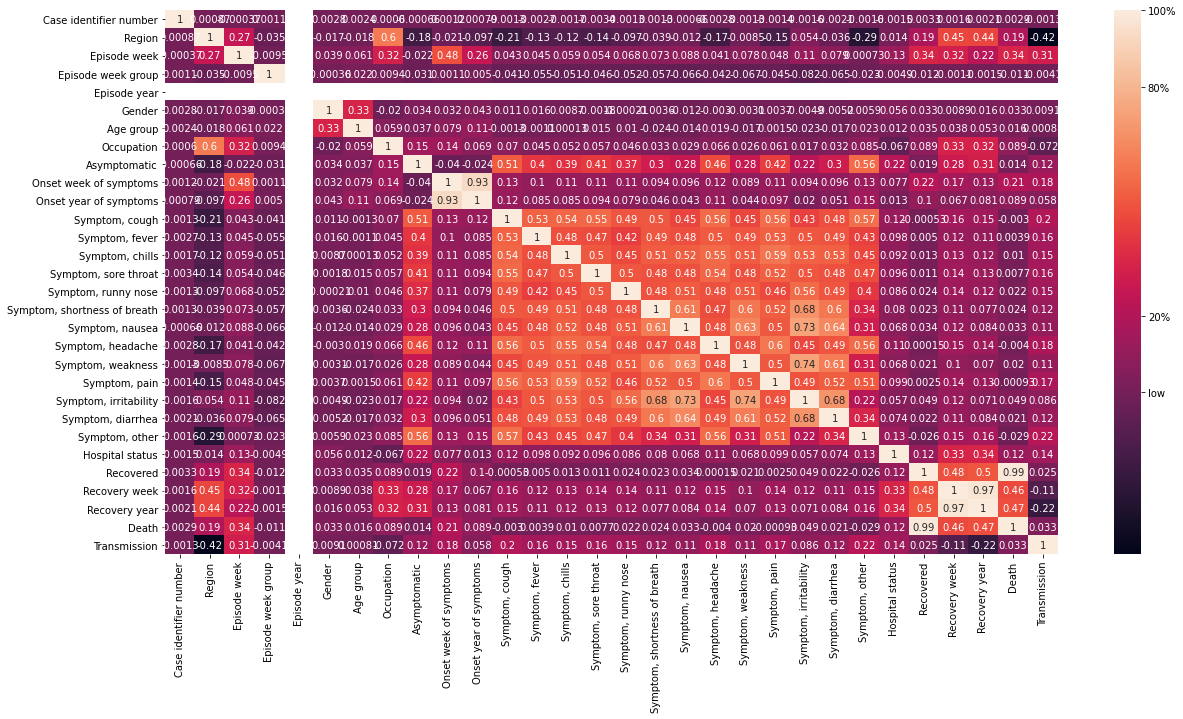

In [8]:
Var_Corr = df.corr()
# print(Var_Corr)

# plot the heatmap and annotation on it
plt.figure(figsize=(20, 10))
ax=sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, .2, .8, 1])
cbar.set_ticklabels(['low', '20%', '80%', '100%'])

columns = np.full((Var_Corr.shape[0],), True, dtype=bool)
for i in range(Var_Corr.shape[0]):
    for j in range(i+1, Var_Corr.shape[0]):
        if Var_Corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]
print("selected columns",selected_columns)
print("No.of selected columns",len(selected_columns))

In [9]:
df=df.drop(['Case identifier number','Episode week group','Onset week of symptoms','Symptom, cough', 'Symptom, fever', 'Symptom, chills', 'Symptom, sore throat','Symptom, runny nose','Symptom, shortness of breath','Symptom, nausea','Symptom, headache','Symptom, weakness','Symptom, pain','Symptom, irritability','Symptom, diarrhea','Symptom, other'],axis=1)
df

,Region,Episode week,Episode year,Gender,Age group,Occupation,Asymptomatic,Hospital status,Recovered,Recovery week,Transmission
0,3,41,20,2,3,4,9,3,9,99,1
1,4,31,20,2,2,4,2,3,1,33,1
2,2,39,20,2,8,4,1,3,1,43,9
3,3,40,20,1,2,4,9,9,1,99,1
4,3,42,20,2,1,4,9,9,1,99,1
...,...,...,...,...,...,...,...,...,...,...,...
360231,4,44,20,1,1,4,2,3,9,99,1
360232,2,47,20,2,5,4,9,3,9,99,9
360233,4,99,20,1,5,4,2,1,1,29,2
360234,3,20,20,1,4,4,9,9,1,99,1


In [10]:
# df[~df['Episode week'].str.contains('99')]
df=df[~df['Episode week'].isin(['99'])]
df=df[~df['Episode year'].isin(['99'])]
df=df[~df['Gender'].isin(['9'])]
df=df[~df['Age group'].isin(['99'])]
df=df[~df['Occupation'].isin(['9'])]
df=df[~df['Asymptomatic'].isin(['9'])]
df=df[~df['Hospital status'].isin(['9'])]
df=df[~df['Recovered'].isin(['99'])]
df=df[~df['Recovery week'].isin(['99'])]
df=df[~df['Transmission'].isin(['9'])]
df

,Region,Episode week,Episode year,Gender,Age group,Occupation,Asymptomatic,Hospital status,Recovered,Recovery week,Transmission
1,4,31,20,2,2,4,2,3,1,33,1
10,4,26,20,2,6,4,2,3,1,28,1
13,4,35,20,2,7,4,2,3,1,37,1
18,4,31,20,2,4,4,2,3,1,33,1
40,4,41,20,1,1,4,2,3,1,45,1
...,...,...,...,...,...,...,...,...,...,...,...
360196,4,45,20,2,7,4,2,3,1,46,1
360199,2,16,20,2,8,4,1,3,1,17,1
360225,4,43,20,1,3,4,2,3,1,45,1
360227,4,44,20,1,3,4,2,3,1,45,1


In [11]:
def pca_transform(n_comp):
    pca = PCA(n_components=n_comp, random_state=123)
    global Data_reduced
    Data_reduced = pca.fit_transform(df)
    print('Shape of the new Data df: ' + str(Data_reduced.shape))

In [12]:
pca_transform(n_comp=1)

Shape of the new Data df: (43438, 1)


In [20]:
# Generate sample data
centers = [[22, 1], [-5, -5]]
X, labels_true = make_blobs(n_samples=43438, centers=centers, cluster_std=0.4,
                            random_state=123)

In [21]:
# Standardize the data
X_std = StandardScaler().fit_transform(X)

In [22]:
# Compute DBSCAN
db = DBSCAN(eps=0.395555, min_samples=6).fit(X_std)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print("Labels after DBSCAN Clusetring: ",labels)
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#n_clusters_=3
n_noise_ = list(labels).count(-1)
#n_noise_=1
for i in range(0,len((db.labels_))):
    if(labels[i]==-1):
        print((df.index[i]))
        #print('\n')
        
print('\n')        
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Labels after DBSCAN Clusetring:  [0 0 1 ... 1 1 1]


Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.974


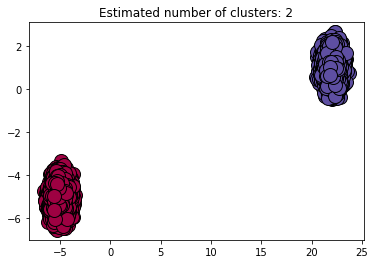

In [23]:
# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Text(0, 0.5, 'Asymptomatic')

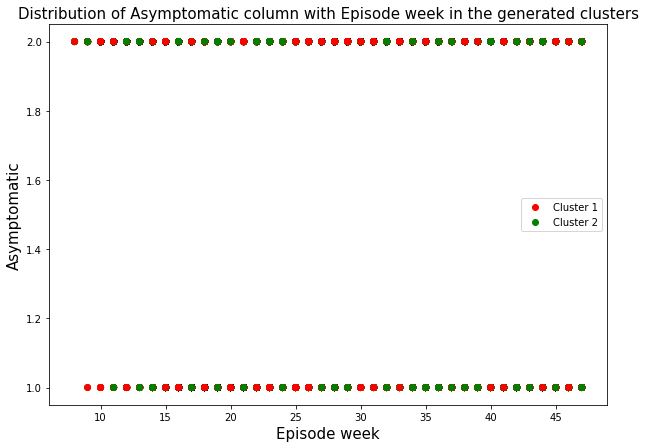

In [24]:
plt.figure(figsize=(10, 7))  
x = df['Episode week']
y = df['Asymptomatic']
classes = ['Cluster 1', 'Cluster 2']
values =labels
colours = ListedColormap(['r','g'])
scatter = plt.scatter(x, y,c=values, cmap=colours)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("Distribution of Asymptomatic column with Episode week in the generated clusters",fontsize=15)
plt.xlabel("Episode week",fontsize=15)
plt.ylabel("Asymptomatic",fontsize=15)

Text(0, 0.5, 'Recovery week')

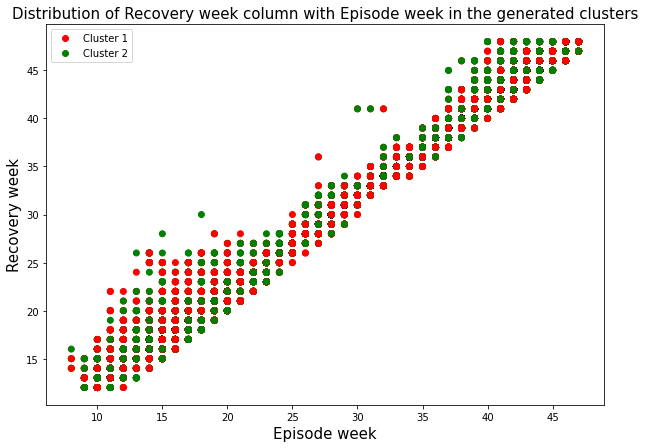

In [26]:
plt.figure(figsize=(10, 7))  
x = df['Episode week']
y = df['Recovery week']
classes = ['Cluster 1', 'Cluster 2']
values = labels
colours = ListedColormap(['r','g'])
scatter = plt.scatter(x, y,c=values, cmap=colours)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("Distribution of Recovery week column with Episode week in the generated clusters",fontsize=15)
plt.xlabel("Episode week",fontsize=15)
plt.ylabel("Recovery week",fontsize=15)

In [28]:
df['Labels']=labels
df.head(10)

,Region,Episode week,Episode year,Gender,Age group,Occupation,Asymptomatic,Hospital status,Recovered,Recovery week,Transmission,Labels
1,4,31,20,2,2,4,2,3,1,33,1,0
10,4,26,20,2,6,4,2,3,1,28,1,0
13,4,35,20,2,7,4,2,3,1,37,1,1
18,4,31,20,2,4,4,2,3,1,33,1,1
40,4,41,20,1,1,4,2,3,1,45,1,0
41,4,38,20,2,3,4,1,3,1,40,1,1
43,4,46,20,1,1,4,2,3,1,48,1,0
50,4,17,20,2,1,4,2,3,1,18,1,1
55,4,38,20,1,4,4,2,3,1,39,1,0
64,4,34,20,1,2,4,2,3,1,34,1,1


In [29]:
pd.Series(labels).value_counts()

1    21719
0    21719
dtype: int64

C:\Users\Sainaa\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Sainaa\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Sainaa\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


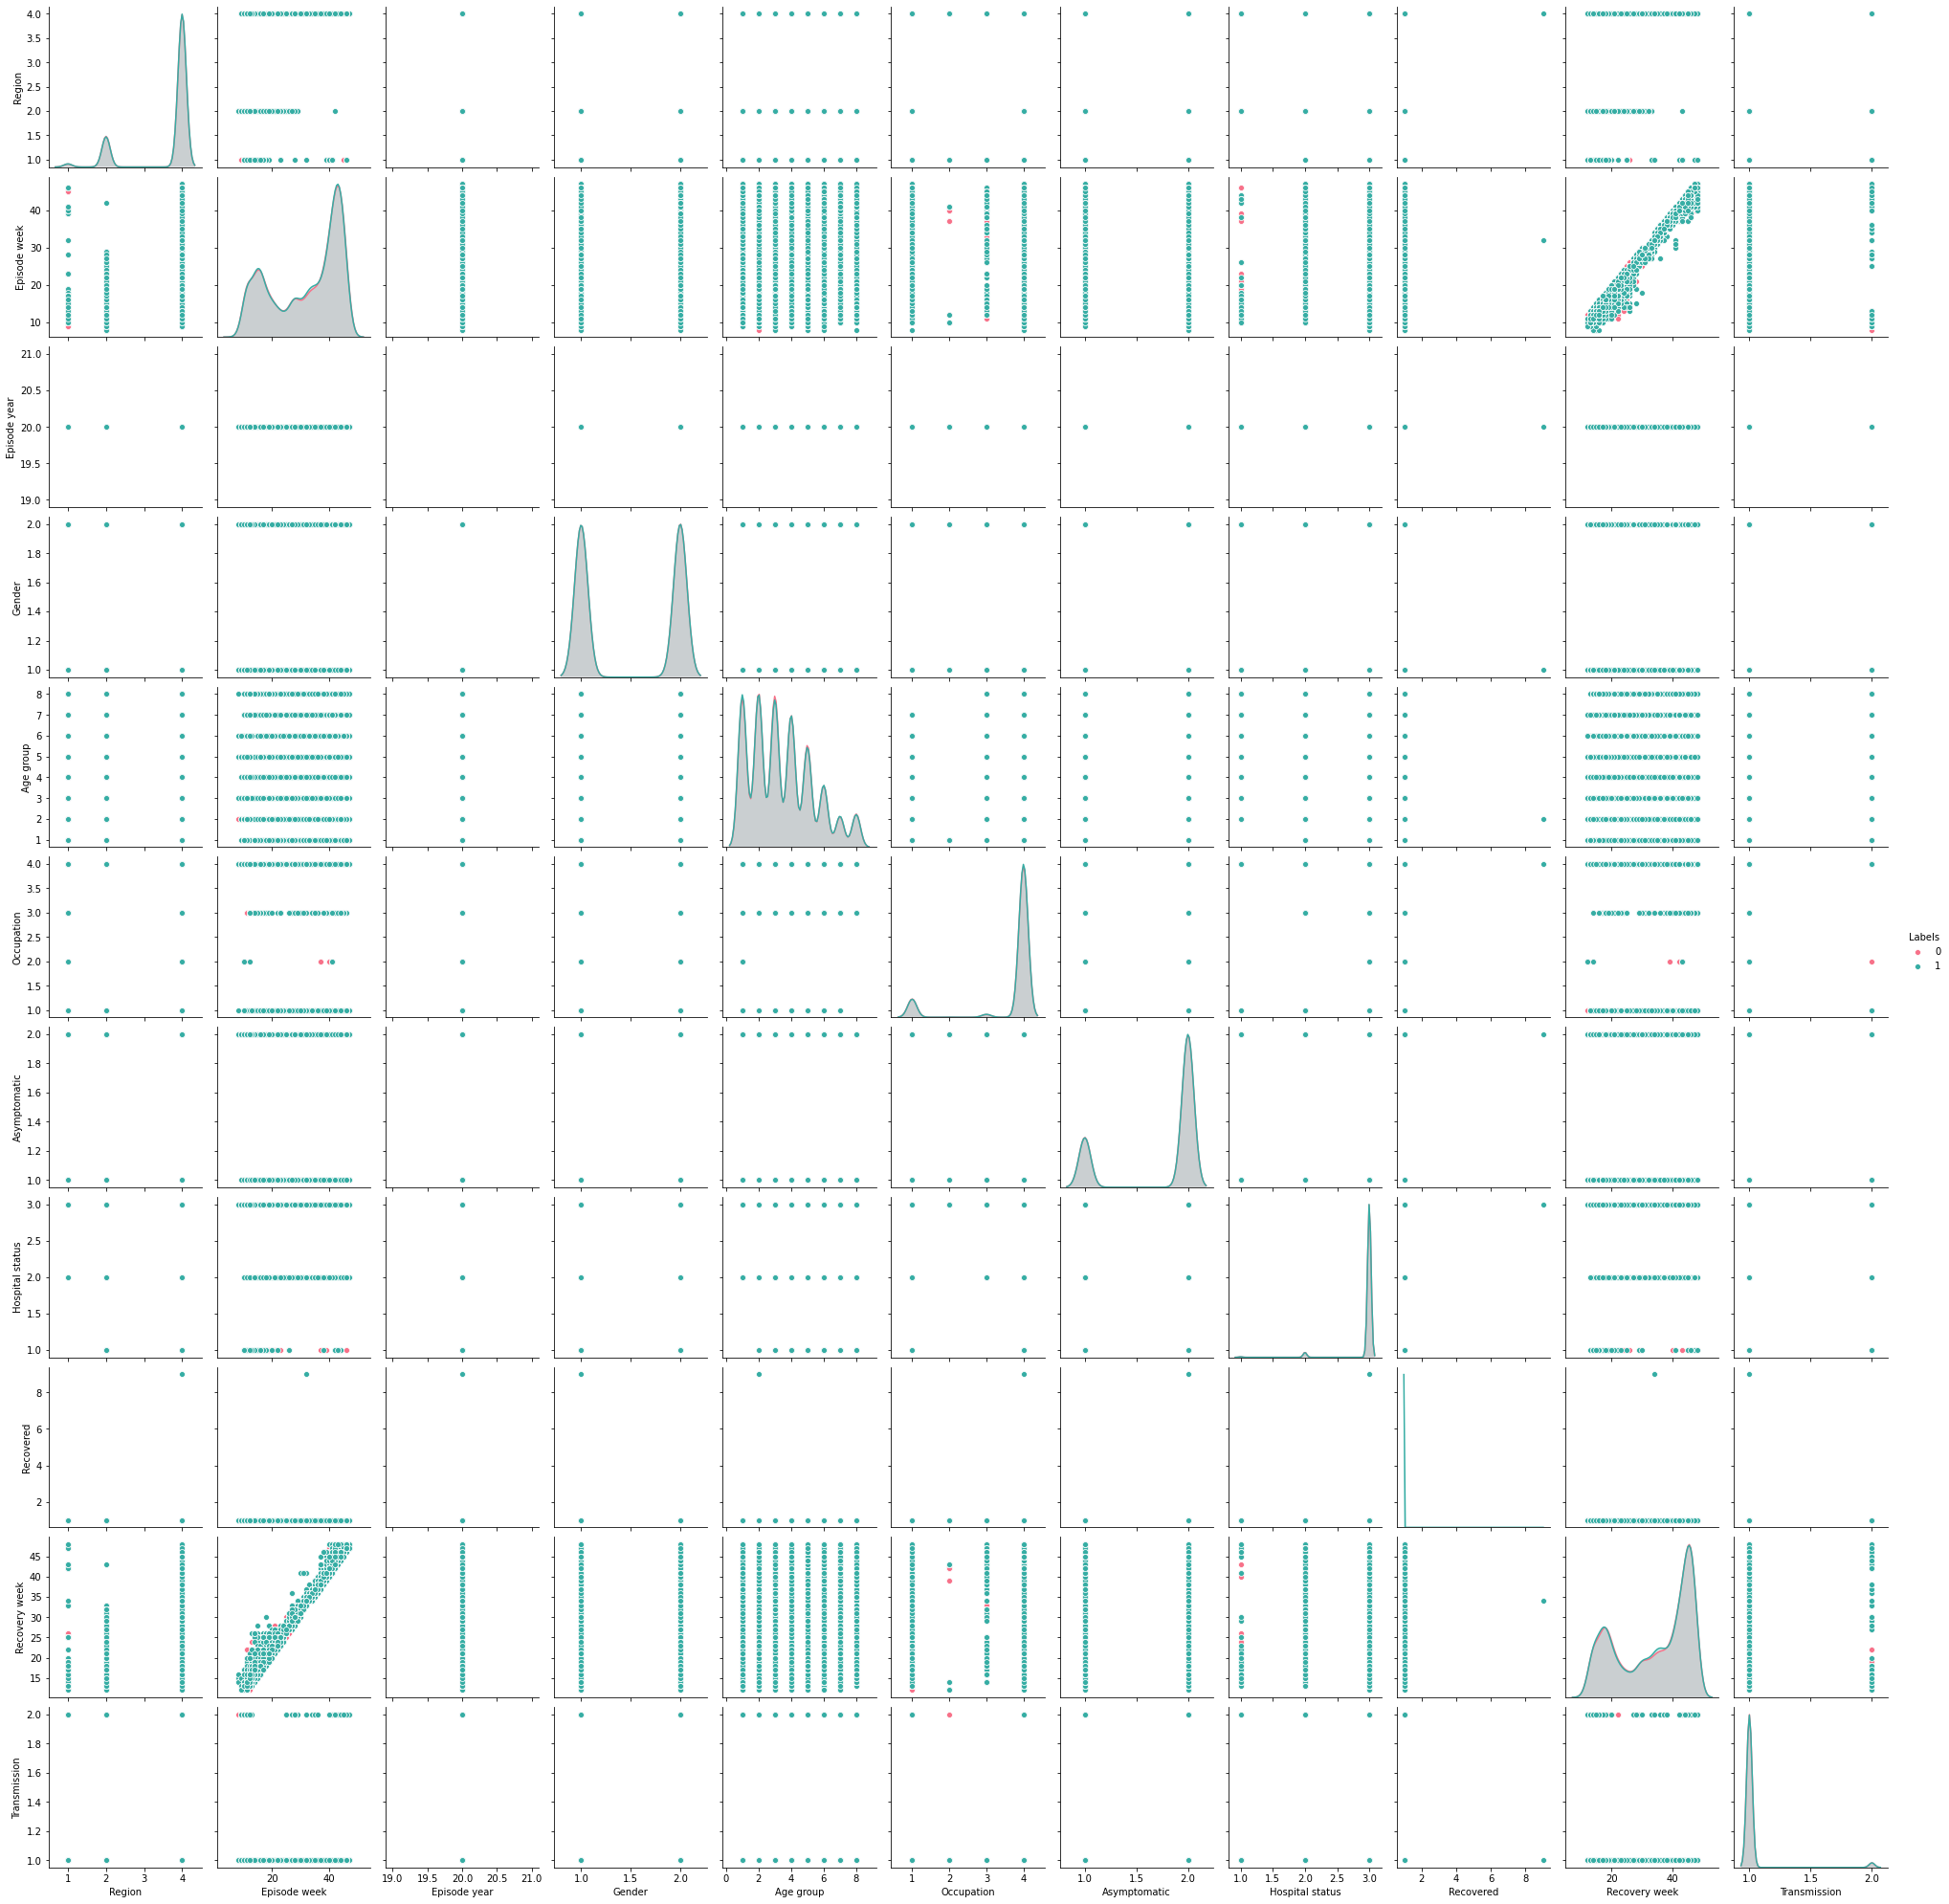

In [30]:
sns.pairplot(df,hue = 'Labels',diag_kind = "kde",kind = "scatter",palette = "husl")